# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Agil Julian Nugroho
- **Email:** agil.julian6@gmail.com
- **ID Dicoding:** MC006D5Y2125

## Menentukan Pertanyaan Bisnis

- Bagaimana tren dan distribusi transaksi di setiap bulannya?
- Bagaimana kinerja produk berdasarkan harga dan ulasan pelanggan?
- Bagaimana distribusi transaksi berdasarkan wilayah?

## Import Semua Packages/Library yang Digunakan

In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Wrangling

### Gathering Data

In [528]:
customers_df = pd.read_csv(r'data\customers_dataset.csv')
geolocation_df = pd.read_csv(r'data\geolocation_dataset.csv')
order_items_df = pd.read_csv(r'data\order_items_dataset.csv')
order_payments_df = pd.read_csv(r'data\order_payments_dataset.csv')
order_reviews_df = pd.read_csv(r'data\order_reviews_dataset.csv')
orders_df = pd.read_csv(r'data\orders_dataset.csv')
product_translation_df = pd.read_csv(r'data\product_category_name_translation.csv')
product_df = pd.read_csv(r'data\products_dataset.csv')
sellers_df = pd.read_csv(r'data\sellers_dataset.csv')

#### Melihat isi dari masing-masing dataframe 

In [529]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [530]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [531]:
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [532]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [533]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [534]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [535]:
product_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [536]:
product_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [537]:
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**Insight:**
- Dari kumpulan data tersebut bisa dilihat ada beberapa dataset yang mungkin tidak diperlukan. Seperti `product_translation_df` dengan dua atribut yang terjemahan dari dua bahasa, kemudian `geolocation_df` yang hanya memiliki perbedaan pada atribut `geolocation_lat` dan `geolocation_ng` dibandingkan dengan dataset `customer_df` dan `sellers_df`.

### Assessing Data

#### Menilai dataset customer_df

In [538]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Terlihat bahwa dataset `customer_df` memiliki 99441 datum. Dari kelima fitur yang dimiliki dataset tersebut tidak ditemukan _missing values_ di dalamnya.

In [539]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Dari segi statistika deskriptif, dataset `customer_df` tidak memiliki permasalahan.

In [540]:
customers_df.duplicated().sum()

np.int64(0)

Dataset `customer_df` juga tidak memiliki duplikasi datum di dalamnya. Sehingga dataset ini tidak perlu dilakukan _cleaning_ pada tahap selanjutnya.

#### Menilai dataset geolocation

In [541]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Terlihat bahwa dataset `geolocation_df` memiliki 1000163 datum. Dari kelima fitur yang dimiliki dataset tersebut tidak ditemukan _missing values_ di dalamnya.

In [542]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Dari segi statistika deskriptif, dataset `geolocation_df` memiliki outlier pada nilai maksimum latitude dan longitude.

In [543]:
geolocation_df.duplicated().sum()

np.int64(261831)

Didapatkan data duplikat di dalam dataset `geolocation_df`, sehingga harus dilakukan _cleaning pada tahap selanjutnya.

#### Menilai dataset order_items_df

In [544]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terlihat bahwa dataset `order_items_df` memiliki 112650 datum. Dari ketujuh fitur yang dimiliki dataset tersebut tidak ditemukan _missing values_ di dalamnya.

In [545]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Dari segi statistik deskriptif dapat dilihat untuk ketiga fitur tersebut memiliki nilai maksimal yang cukup jauh dari nilai Q3. Oleh karena itu, kemungkinan dataset tersebut memiliki outlier di dalamnya. Sehingga harus dilakukan _cleaning_ agar tidak mengalami bias terhadap _outlier_.

In [546]:
order_items_df.duplicated().sum()

np.int64(0)

Tidak didapatkan duplikasi data didalam dataset `order_items_df`.

#### Menilai dataset order_payments_df

In [547]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tidak terdapat _missing values_ pada dataset `order_payments_df`.

In [548]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Dari segi statistik deskriptif dapat dilihat untuk ketiga fitur tersebut memiliki nilai maksimal yang cukup jauh dari nilai Q3. Oleh karena itu, kemungkinan dataset tersebut memiliki outlier di dalamnya. Sehingga harus dilakukan _cleaning_ agar tidak mengalami bias terhadap _outlier_.

In [549]:
order_payments_df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat pada dataset `order_paymens_df`

#### Menilai dataset order_reviews_df

In [550]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Fitur `review_creation_date` dan `review_answer_timestamp` yang menyatakan waktu tapi bertipe objek, sehingga harus diubah menjadi datetime. Kemudian kolom `review_comment_title`dan `review_comment_message` memiliki missing value lebih dari 50%, sehingga kolom tersebut akan dibuang.

In [551]:
fitur_waktu = ['review_creation_date','review_answer_timestamp']
for column in fitur_waktu:
    order_reviews_df[column]=pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [552]:
order_reviews_df.describe()

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


In [553]:
order_reviews_df.duplicated().sum()

np.int64(0)

Tidak ada permasalahan dalam segi statistika deskriptif dan data duplikat.

#### Menilai dataset orders_df

In [554]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [555]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Fitur-fitur yang menyatakan waktu bertipe objek, sehingga harus diubah menjadi datetime. Kemudian ada beberapa fitur yang memiliki _missing values_ sehingga harus dilakukan pembersihan data.

In [556]:
fitur_waktu = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
               'order_delivered_customer_date','order_estimated_delivery_date']
for column in fitur_waktu:
    orders_df[column]=pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [557]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [558]:
orders_df.duplicated().sum()

np.int64(0)

Tidak ada masalah pada segi statistika deskriptif dan data duplikat.

#### Menilai dataset product_translation_df

In [559]:
product_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [560]:
product_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [561]:
product_translation_df.duplicated().sum()

np.int64(0)

Dataset `product_translation` tidak memiliki permasalahan.

#### Menilai dataset product_df

In [562]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [563]:
product_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Pada dataset `product` ini terdapat 32951 datum. Terdapat beberapa fitur yang memiliki _missing values_ sehingga harus dilakukan pembersihan data.

In [564]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [565]:
product_df.duplicated().sum()

np.int64(0)

Tidak ada permasalahn pada segi statistika deskriptif dan data duplikat.

#### Menilai dataset sellers_df

In [566]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [567]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [568]:
sellers_df.duplicated().sum()

np.int64(0)

Tidak ada permasalahan pada dataset `sellers_df`.

**Insight:**
- Terdapat beberapa dataset yang memiliki _missing values_ sehingga harus dilakukan pembersihan data di dalamnya.
- Dataset geolocation memiliki banyak data duplikasi di dalamnya, sehingga harus dilakukan penghapusan data duplikasi agara analisis data dapat dilaksanakan.

### Cleaning Data

#### Cleaning data geological_df

In [569]:
def mengatasi_outlier(data:list):
    Q1 = (data).quantile(0.25)
    Q3 = (data).quantile(0.75)
    IQR = Q3 - Q1
    
    maximum = Q3 + (1.5*IQR)
    minimum = Q1 - (1.5*IQR)
    
    kondisi_lower_than = data < minimum
    kondisi_more_than = data > maximum
    
    data.mask(cond=kondisi_more_than, other=maximum, axis=0, inplace=True)
    data.mask(cond=kondisi_lower_than, other=minimum, axis=0, inplace=True)
    return data



In [570]:
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


In [571]:
geolocation_df.duplicated().sum()

np.int64(0)

Sudah tidak ada duplikasi data pada dataset `geological_df`.

In [572]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


Terlihat dari 700-ribuan datum nilai dari `geolocation_zip_code_prefix` yang seharusnya unik hanya berada pada rentang 1001-99990 ($\pm100000$ data). Kemungkinan terdapat duplikasi pada fitur tersebut.

In [573]:
geolocation_df['geolocation_zip_code_prefix'].duplicated().sum()

np.int64(719317)

Terlihat bahwa terdapat hampir 700-ribuan data duplikat pada kolom tersebut. Akan diperikasa apakah pada masing-masing data memiliki karakteristik yang mirip.

In [574]:
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [575]:
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [576]:
bygeocode = geolocation_df.groupby(by='geolocation_zip_code_prefix').agg({
    'geolocation_lat':'std',
    'geolocation_lng':'std',
    'geolocation_city':'nunique',
    'geolocation_state':'nunique'
}).sort_values(by='geolocation_city').reset_index()

In [577]:
city_lebih = bygeocode[bygeocode.geolocation_city>1]

In [578]:
city_lebih

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
10459,1024,0.000426,0.000135,2,1
10460,1010,0.001037,0.000672,2,1
10461,1011,0.000843,0.000513,2,1
10462,1012,0.000788,0.000269,2,1
10463,1013,0.000368,0.000066,2,1
...,...,...,...,...,...
19010,13455,0.008503,0.005843,5,1
19011,13457,0.004478,0.012166,5,1
19012,13318,0.024195,0.520690,5,1
19013,6900,0.035991,0.016408,5,1


In [579]:
city_lebih.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,8556.000000,8556.000000,8556.000000,8556.000000,8556.000000
mean,34783.151940,0.064824,0.058396,2.039271,1.000584
std,32292.348831,0.979361,0.823195,0.224404,0.024168
min,1001.000000,0.000000,0.000000,2.000000,1.000000
25%,4767.500000,0.001847,0.001913,2.000000,1.000000
50%,23933.000000,0.003703,0.003954,2.000000,1.000000
75%,68901.250000,0.008520,0.009263,2.000000,1.000000
max,99970.000000,48.312475,40.056862,5.000000,2.000000


Bisa dilihat bahwa rata-rata `std` dari fitur `geolocation_lat`	dan `geolocation_lng` cukup rendah. Hal ini menyatakan bahwa perbedaan koordinat pada masing-masing `geolocation_zip_code_prefix` cukup kecil, hal ini mengindikasikan bahwa satu `geolocation_zip_code_prefix` masih berada pada wilayah yang berdekatan. Selanjutnya akan dilihat apakah satu `geolocation_zip_code_prefix` memiliki kota dan state yang sama.

In [580]:
kota_unik = {'code':[],
             'kota':[],
             'state':[]}
             
for code in city_lebih['geolocation_zip_code_prefix']:
    kota_unik['code'].append(code)
    kota_unik['kota'].append(geolocation_df[geolocation_df.geolocation_zip_code_prefix==code]['geolocation_city'].unique())
    kota_unik['state'].append(geolocation_df[geolocation_df.geolocation_zip_code_prefix==code]['geolocation_state'].unique())

In [581]:
pd.DataFrame(kota_unik).sample(30)

,code,kota,state
8321,25935,"[mage, magé, inhomirim]",[RJ]
4814,5332,"[sao paulo, são paulo]",[SP]
7974,2227,"[sao paulo, são paulo]",[SP]
3099,65780,"[governador eugenio barros, governador eugênio...",[MA]
1886,59508,"[ipanguacu, ipanguaçu]",[RN]
1754,18304,"[capao bonito, capão bonito]",[SP]
254,39707,"[sao jose do jacuri, são josé do jacuri]",[MG]
1515,24755,"[são gonçalo, sao goncalo]",[RJ]
7818,2358,"[sao paulo, são paulo]",[SP]
3353,68490,"[melgaco, melgaço]",[PA]


Didapatkan pada masing-masing code jumlah kota dan state hanya satu (jika lebih dari satu merupakan typo.) Oleh karena itu bisa disimpulkan bahwa satu `geolocation_zip_code_prefix` mewakili satu daerah yang berdekatan, sehingga bisa dilakukan penghapusan duplikat pada fitur `'geolocation_zip_code_prefix'`.

In [582]:
geolocation_df.drop_duplicates(subset='geolocation_zip_code_prefix',inplace=True)

In [583]:
geolocation_df=geolocation_df.reset_index()

In [584]:
geolocation_df.drop(columns='index', inplace=True)
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1041,-23.544392,-46.639499,sao paulo,SP
3,1035,-23.541578,-46.641607,sao paulo,SP
4,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...
19010,99955,-28.107588,-52.144019,vila langaro,RS
19011,99970,-28.345143,-51.876926,ciriaco,RS
19012,99910,-27.863500,-52.084760,floriano peixoto,RS
19013,99920,-27.858716,-52.300403,erebango,RS


#### Cleaning data order_items_df

In [585]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Terlihat bahwa ketiga atribut numerik tersebut memiliki outlier, sehingga akan diatasi dengan mengubahnya menjadi batas atas maupun batas bawahnya.

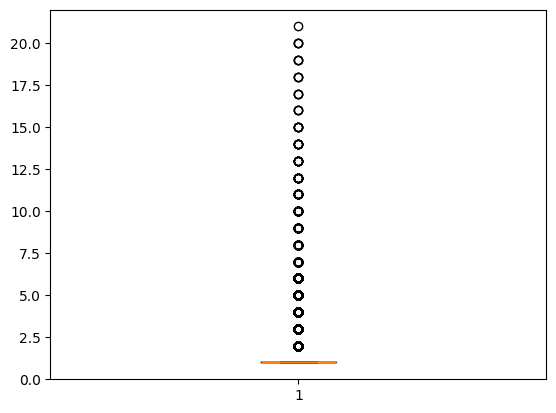

In [586]:
plt.boxplot(x=order_items_df['order_item_id'])
plt.show()

In [587]:
order_items_df['order_item_id']=mengatasi_outlier(order_items_df['order_item_id'])

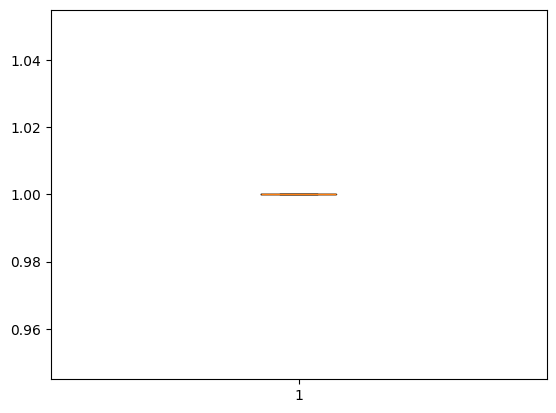

In [588]:
plt.boxplot(x=order_items_df['order_item_id'])
plt.show()

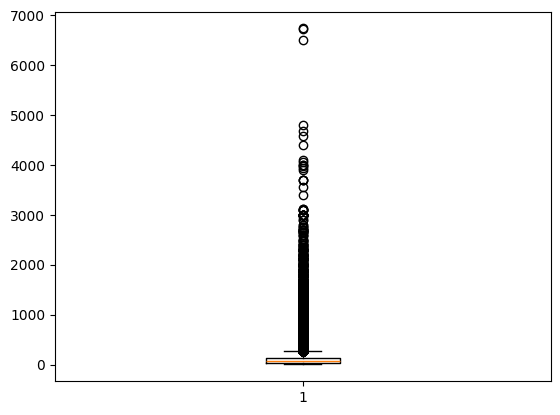

In [589]:
plt.boxplot(x=order_items_df['price'])
plt.show()

In [590]:
order_items_df['price']=mengatasi_outlier(order_items_df['price'])

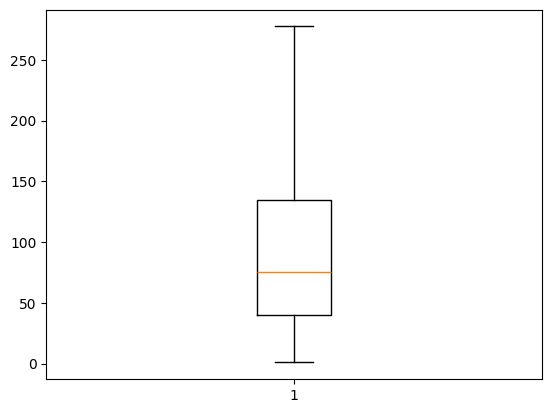

In [591]:
plt.boxplot(x=order_items_df['price'])
plt.show()

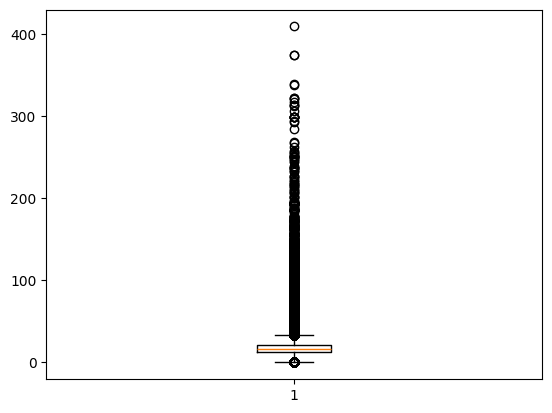

In [592]:
plt.boxplot(x=order_items_df['freight_value'])
plt.show()

In [593]:
order_items_df['freight_value']=mengatasi_outlier(order_items_df['freight_value'])

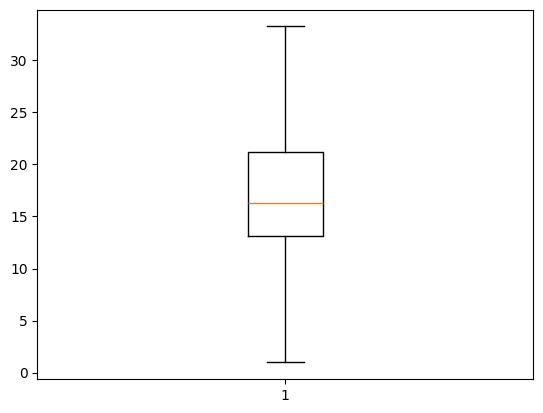

In [594]:
plt.boxplot(x=order_items_df['freight_value'])
plt.show()

In [595]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.0,112650.000000,112650.000000
mean,1.0,98.444222,17.821461
std,0.0,75.923244,7.424145
min,1.0,0.850000,0.975000
25%,1.0,39.900000,13.080000
50%,1.0,74.990000,16.260000
75%,1.0,134.900000,21.150000
max,1.0,277.400000,33.255000


#### Cleaning data order_payment_df

In [596]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Terlihat bahwa ketiga atribut numerik tersebut memiliki outlier, sehingga akan diatasi dengan mengubahnya menjadi batas atas maupun batas bawahnya.

In [597]:
order_payments_df.select_dtypes(include=['number']).columns

Index(['payment_sequential', 'payment_installments', 'payment_value'], dtype='object')

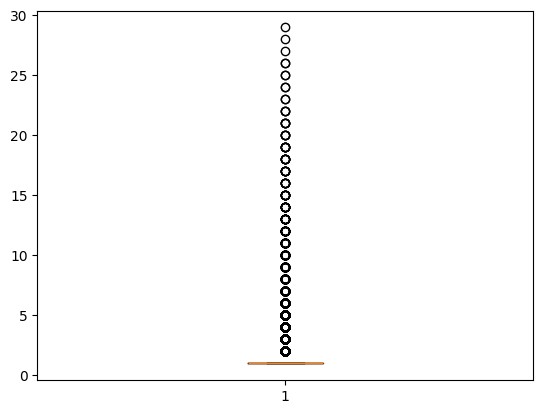

In [598]:
plt.boxplot(order_payments_df['payment_sequential'])
plt.show()

In [599]:
order_payments_df['payment_sequential']=mengatasi_outlier(order_payments_df['payment_sequential'])

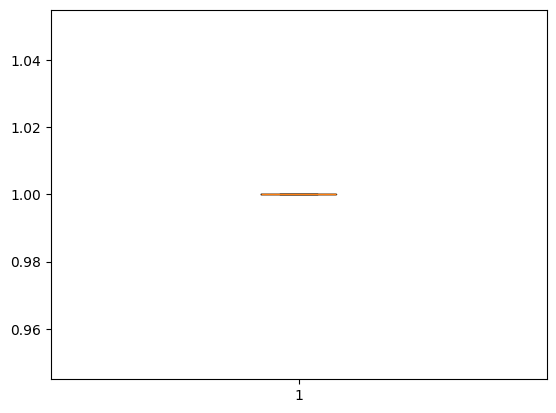

In [600]:
plt.boxplot(order_payments_df['payment_sequential'])
plt.show()

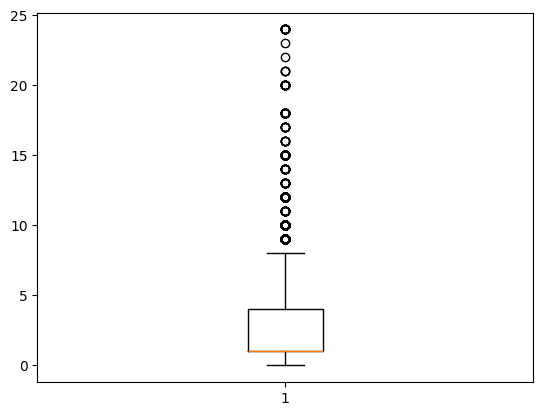

In [601]:
plt.boxplot(order_payments_df['payment_installments'])
plt.show()

In [602]:
order_payments_df['payment_installments']=mengatasi_outlier(order_payments_df['payment_installments'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25828\3784838545.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.mask(cond=kondisi_more_than, other=maximum, axis=0, inplace=True)


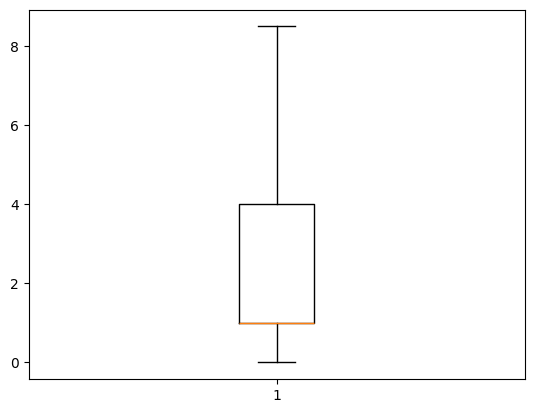

In [603]:
plt.boxplot(order_payments_df['payment_installments'])
plt.show()

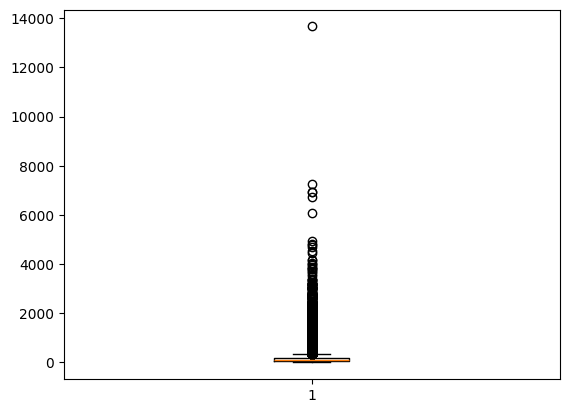

In [604]:
plt.boxplot(order_payments_df['payment_value'])
plt.show()

In [605]:
order_payments_df['payment_value']=mengatasi_outlier(order_payments_df['payment_value'])

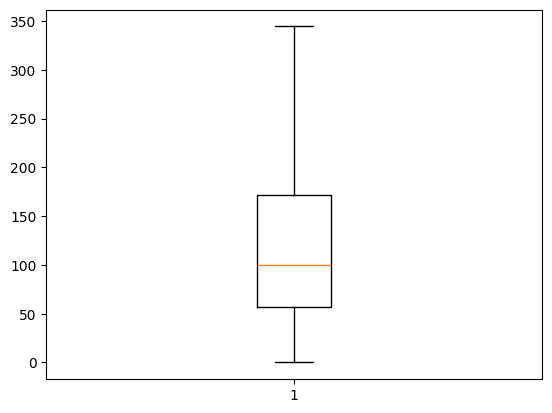

In [606]:
plt.boxplot(order_payments_df['payment_value'])
plt.show()

In [607]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.0,103886.000000,103886.000000
mean,1.0,2.753485,128.065718
std,0.0,2.409891,93.731834
min,1.0,0.000000,0.000000
25%,1.0,1.000000,56.790000
50%,1.0,1.000000,100.000000
75%,1.0,4.000000,171.837500
max,1.0,8.500000,344.408750


#### Cleaning Data orders_reviews_df

In [608]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Karena fitur `review_comment_title` dan `review_comment_message` memiliki datum kurang dari setengah keseluruhan data, maka fitur tersebut akan dihapus.

In [609]:
order_reviews_df.drop(columns=['review_comment_title','review_comment_message'],inplace=True)
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


#### Cleaning data orders_df

In [610]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [611]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Karena nilai _missing values_ nya relatif sedikit, maka _missing values_ tersebut akan dihapus.

In [612]:
orders_df.dropna(inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### Cleaning data product_df

Untuk tipe data kategorik akan dilakukan mode imputation, sedangkan untuk data numerik (normal) akan dilakukan mean imputation dan data numerik (tidak normal) akan dilakukan median imputation.

In [613]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [614]:
product_df['product_category_name']=product_df['product_category_name'].fillna(product_df['product_category_name'].mode()[0])

Untuk mengetahui apakah atribut tersebut berdistribusi normal, akan diperiksa menggunakan histogram dan uji Kolmogorov-Smirnov.

In [615]:
def cek_normal(data):
    plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
    plt.title("Histogram Distribusi Data")
    plt.xlabel("Nilai")
    plt.ylabel("Frekuensi")
    plt.show()

    stat, p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f"Kolmogorov-Smirnov Test: Statistik={stat}, p-value={p}")

    if p > 0.05:
        print("Data berdistribusi normal")
    else:
        print("Data tidak berdistribusi normal")

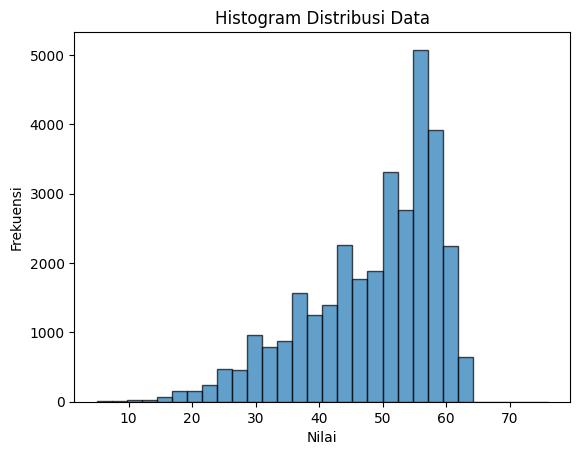

Kolmogorov-Smirnov Test: Statistik=nan, p-value=nan
Data tidak berdistribusi normal


In [616]:
cek_normal(product_df['product_name_lenght'])

In [617]:
product_df['product_name_lenght']=product_df['product_name_lenght'].fillna(product_df['product_name_lenght'].median())

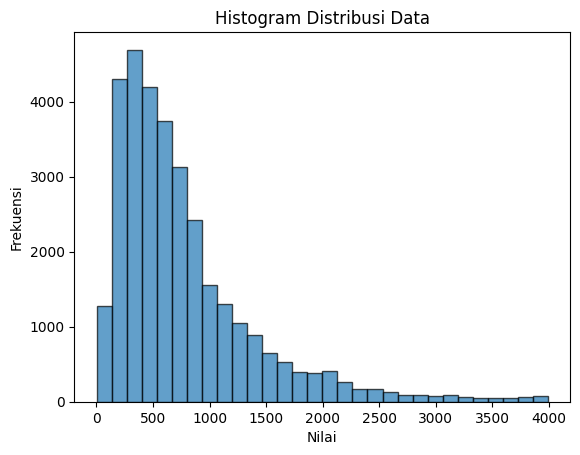

Kolmogorov-Smirnov Test: Statistik=nan, p-value=nan
Data tidak berdistribusi normal


In [618]:
cek_normal(product_df['product_description_lenght'])

In [619]:
product_df['product_description_lenght']=product_df['product_description_lenght'].fillna(product_df['product_description_lenght'].median())

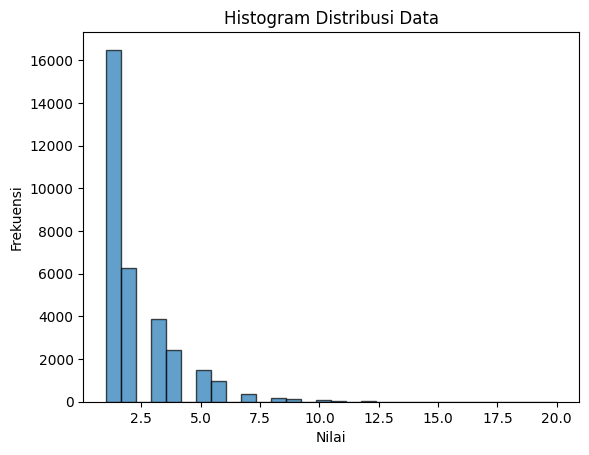

Kolmogorov-Smirnov Test: Statistik=nan, p-value=nan
Data tidak berdistribusi normal


In [620]:
cek_normal(product_df['product_photos_qty'])

In [621]:
product_df['product_photos_qty']=product_df['product_photos_qty'].fillna(product_df['product_photos_qty'].median())

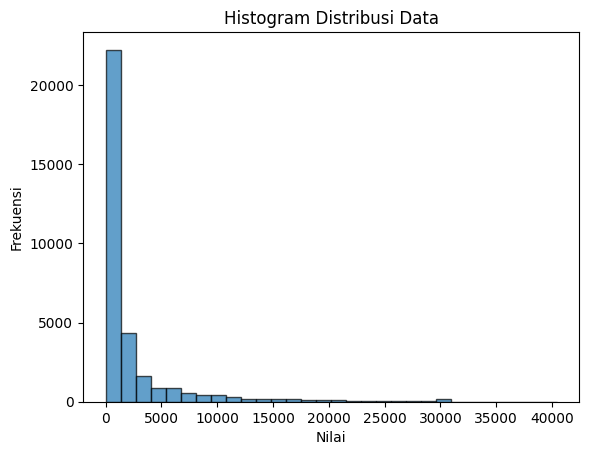

Kolmogorov-Smirnov Test: Statistik=nan, p-value=nan
Data tidak berdistribusi normal


In [622]:
cek_normal(product_df['product_weight_g'])

In [623]:
product_df['product_weight_g']=product_df['product_weight_g'].fillna(product_df['product_weight_g'].median())

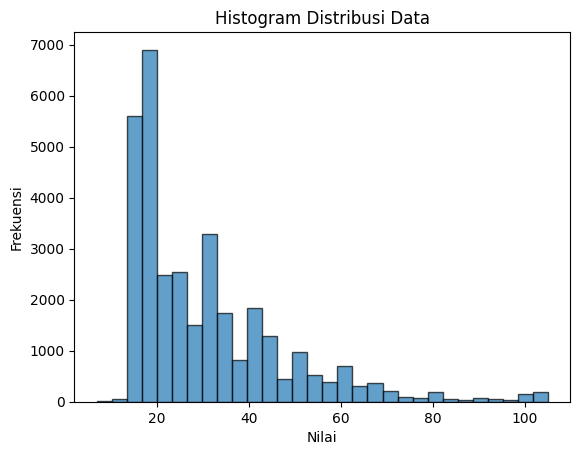

Kolmogorov-Smirnov Test: Statistik=nan, p-value=nan
Data tidak berdistribusi normal


In [624]:
cek_normal(product_df['product_length_cm'])

In [625]:
product_df['product_length_cm']=product_df['product_length_cm'].fillna(product_df['product_length_cm'].median())

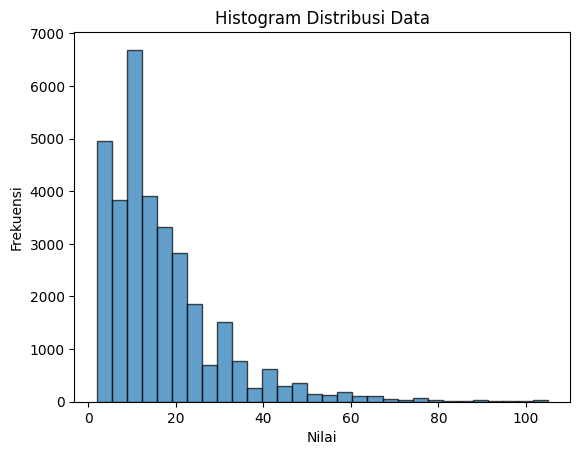

Kolmogorov-Smirnov Test: Statistik=nan, p-value=nan
Data tidak berdistribusi normal


In [626]:
cek_normal(product_df['product_height_cm'])

In [627]:
product_df['product_height_cm']=product_df['product_height_cm'].fillna(product_df['product_height_cm'].median())

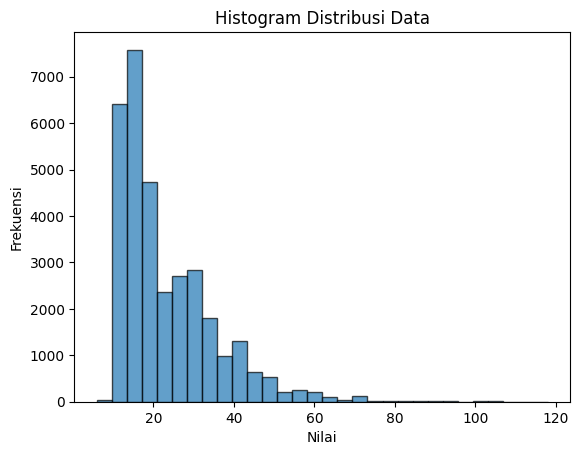

Kolmogorov-Smirnov Test: Statistik=nan, p-value=nan
Data tidak berdistribusi normal


In [628]:
cek_normal(product_df['product_width_cm'])

In [629]:
product_df['product_width_cm']=product_df['product_width_cm'].fillna(product_df['product_width_cm'].median())

In [630]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- xxx
- xxx

### Menggabungkan data

#### customer_df dan geolocation_df

In [631]:
cust_geo_df = pd.merge(
    left=customers_df,
    right=geolocation_df[['geolocation_zip_code_prefix',	'geolocation_lat',	'geolocation_lng']],
    how='inner',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)

In [632]:
cust_geo_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056,-22.987222,-47.151073
...,...,...,...,...,...,...,...,...
99158,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,3937,-23.587901,-46.501830
99159,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,6764,-23.612294,-46.765787
99160,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,60115,-3.744128,-38.510859
99161,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,92120,-29.956391,-51.167614


In [633]:
cust_geo_df.drop(columns='geolocation_zip_code_prefix', inplace=True)
cust_geo_df.rename(columns={'geolocation_lat':'cust_lat',	'geolocation_lng':'cust_lng'},inplace=True)
cust_geo_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,cust_lat,cust_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.987222,-47.151073
...,...,...,...,...,...,...,...
99158,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.587901,-46.501830
99159,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.612294,-46.765787
99160,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.744128,-38.510859
99161,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.956391,-51.167614


#### sellers_df dan geolocation_df

In [634]:
sell_geo_df = pd.merge(
    left=sellers_df,
    right=geolocation_df[['geolocation_zip_code_prefix',	'geolocation_lat',	'geolocation_lng']],
    how='inner',
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix'
)
sell_geo_df.drop(columns='geolocation_zip_code_prefix', inplace=True)
sell_geo_df.rename(columns={'geolocation_lat':'seller_lat',	'geolocation_lng':'seller_lng'},inplace=True)
sell_geo_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.382941,-46.946641
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.910641,-43.176510
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657250,-46.610759
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.971648,-46.533618
...,...,...,...,...,...,...
3083,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,-23.456431,-51.866369
3084,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,-27.623801,-48.674286
3085,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,-23.659845,-46.677882
3086,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.744231,-52.328761


#### Seluruh order

In [635]:
order_1=pd.merge(
    left=orders_df,
    right=order_items_df,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

order_1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.720
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.760
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.220
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.200
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.100
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,33.255
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,33.255
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,33.255


In [636]:
order_2=pd.merge(
    left=order_1,
    right=order_payments_df,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

order_2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.720,1,credit_card,1.0,18.12000
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.720,1,voucher,1.0,2.00000
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.720,1,voucher,1.0,18.59000
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.760,1,boleto,1.0,141.46000
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.220,1,credit_card,3.0,179.12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115013,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.100,1,credit_card,3.0,195.00000
115014,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,33.255,1,credit_card,5.0,271.01000
115015,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,33.255,1,credit_card,4.0,344.40875
115016,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,33.255,1,credit_card,4.0,344.40875


In [637]:
order = pd.merge(
    left=order_2,
    right=order_reviews_df,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.720,1,credit_card,1.0,18.12000,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.720,1,voucher,1.0,2.00000,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.720,1,voucher,1.0,18.59000,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.760,1,boleto,1.0,141.46000,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.220,1,credit_card,3.0,179.12000,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114837,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,174.90,20.100,1,credit_card,3.0,195.00000,29bb71b2760d0f876dfa178a76bc4734,4,2018-03-01,2018-03-02 17:50:01
114838,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,205.99,33.255,1,credit_card,5.0,271.01000,371579771219f6db2d830d50805977bb,5,2017-09-22,2017-09-22 23:10:57
114839,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,33.255,1,credit_card,4.0,344.40875,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-26,2018-01-27 09:16:56
114840,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,179.99,33.255,1,credit_card,4.0,344.40875,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-26,2018-01-27 09:16:56


#### menggabungkan seluruh dataset

In [638]:
order_cus_df =pd.merge(
    left=order,
    right=cust_geo_df,
    how='inner',
    left_on='customer_id',
    right_on='customer_id'
)

order_cus_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,cust_lat,cust_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114535,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,29bb71b2760d0f876dfa178a76bc4734,4,2018-03-01,2018-03-02 17:50:01,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,-24.001467,-46.446355
114536,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,371579771219f6db2d830d50805977bb,5,2017-09-22,2017-09-22 23:10:57,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,-17.891522,-39.370942
114537,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-26,2018-01-27 09:16:56,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-22.555985,-42.690761
114538,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-26,2018-01-27 09:16:56,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-22.555985,-42.690761


In [639]:
order_cus_sellr_df =pd.merge(
    left=order_cus_df,
    right=sell_geo_df,
    how='inner',
    left_on='seller_id',
    right_on='seller_id'
)

order_cus_sellr_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,cust_lat,cust_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,-23.574809,-46.587471,9350,maua,SP,-23.680114,-46.452454
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,-23.574809,-46.587471,9350,maua,SP,-23.680114,-46.452454
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,-23.574809,-46.587471,9350,maua,SP,-23.680114,-46.452454
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,47813,barreiras,BA,-12.169860,-44.988369,31570,belo horizonte,SP,-19.810119,-43.984727
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,75265,vianopolis,GO,-16.746337,-48.514624,14840,guariba,SP,-21.362358,-48.232976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114275,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,11722,praia grande,SP,-24.001467,-46.446355,17602,tupa,SP,-21.935321,-50.497562
114276,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,45920,nova vicosa,BA,-17.891522,-39.370942,8290,sao paulo,SP,-23.551013,-46.448489
114277,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,28685,japuiba,RJ,-22.555985,-42.690761,37175,ilicinea,MG,-20.944706,-45.827098
114278,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,28685,japuiba,RJ,-22.555985,-42.690761,37175,ilicinea,MG,-20.944706,-45.827098


In [640]:
main_data = pd.merge(
    left=order_cus_sellr_df,
    right=product_df,
    how='inner',
    left_on='product_id',
    right_on='product_id'
)

main_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_lat,seller_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-23.680114,-46.452454,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-23.680114,-46.452454,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-23.680114,-46.452454,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,-19.810119,-43.984727,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,-21.362358,-48.232976,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114275,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,-21.935321,-50.497562,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
114276,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,-23.551013,-46.448489,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
114277,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,-20.944706,-45.827098,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
114278,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,-20.944706,-45.827098,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [641]:
main_data.iloc[:,:10]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415
...,...,...,...,...,...,...,...,...,...,...
114275,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923
114276,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad
114277,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4
114278,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4


In [642]:
main_data.iloc[:,10:20]

,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.720,1,credit_card,1.0,18.12000,a54f0611adc9ed256b57ede6b6eb5114,4
1,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.720,1,voucher,1.0,2.00000,a54f0611adc9ed256b57ede6b6eb5114,4
2,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.720,1,voucher,1.0,18.59000,a54f0611adc9ed256b57ede6b6eb5114,4
3,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.760,1,boleto,1.0,141.46000,8d5266042046a06655c8db133d120ba5,4
4,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.220,1,credit_card,3.0,179.12000,e73b67b67587f7644d5bd1a52deb1b01,5
...,...,...,...,...,...,...,...,...,...,...
114275,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.100,1,credit_card,3.0,195.00000,29bb71b2760d0f876dfa178a76bc4734,4
114276,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,33.255,1,credit_card,5.0,271.01000,371579771219f6db2d830d50805977bb,5
114277,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,33.255,1,credit_card,4.0,344.40875,8ab6855b9fe9b812cd03a480a25058a1,2
114278,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,33.255,1,credit_card,4.0,344.40875,8ab6855b9fe9b812cd03a480a25058a1,2


In [643]:
main_data.iloc[:,20:30]

,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,cust_lat,cust_lng,seller_zip_code_prefix,seller_city
0,2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,9350,maua
1,2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,9350,maua
2,2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,9350,maua
3,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,31570,belo horizonte
4,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,14840,guariba
...,...,...,...,...,...,...,...,...,...,...
114275,2018-03-01,2018-03-02 17:50:01,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,-24.001467,-46.446355,17602,tupa
114276,2017-09-22,2017-09-22 23:10:57,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,-17.891522,-39.370942,8290,sao paulo
114277,2018-01-26,2018-01-27 09:16:56,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-22.555985,-42.690761,37175,ilicinea
114278,2018-01-26,2018-01-27 09:16:56,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-22.555985,-42.690761,37175,ilicinea


In [644]:
main_data.iloc[:,30:]

,seller_state,seller_lat,seller_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,SP,-23.680114,-46.452454,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,SP,-23.680114,-46.452454,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,SP,-23.680114,-46.452454,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,SP,-19.810119,-43.984727,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,SP,-21.362358,-48.232976,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...
114275,SP,-21.935321,-50.497562,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
114276,SP,-23.551013,-46.448489,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
114277,MG,-20.944706,-45.827098,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
114278,MG,-20.944706,-45.827098,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


## Exploratory Data Analysis (EDA)

In [645]:
main_data.groupby(by='customer_city').agg({
    'customer_id' :'nunique'
}).sort_values(by='customer_id',ascending=False)

,customer_id
customer_city,
sao paulo,14912
rio de janeiro,6511
belo horizonte,2674
brasilia,1896
curitiba,1477
...,...
viseu,1
agisse,1
adustina,1


In [646]:
main_data.groupby(by='customer_state').agg({
    'customer_id' :'nunique'
}).sort_values(by='customer_id',ascending=False)

,customer_id
customer_state,
SP,40172
RJ,12162
MG,11246
RS,5307
PR,4877
SC,3511
BA,3211
ES,1958
GO,1933


Dari pivot tabel tersebut bisa terlihat bahwa mayoritas customer bertempat tinggal di kota sao paulo dengan total 14912 customer. Sedangkan jika dilihat dari sisi _state_, mayoritas _customer_ berasal dari _state_ SP dengan total sebanyak 40172 _cusomer_.

In [647]:
main_data.groupby(by='seller_city').agg({
    'seller_id' :'nunique'
}).sort_values(by='seller_id',ascending=False)

,seller_id
seller_city,
sao paulo,660
curitiba,122
rio de janeiro,92
belo horizonte,64
ribeirao preto,50
...,...
timoteo,1
tocantins,1
torres,1


In [648]:
main_data.groupby(by='seller_state').agg({
    'seller_id' :'nunique'
}).sort_values(by='seller_id',ascending=False)

,seller_id
seller_state,
SP,1765
PR,332
MG,234
SC,184
RJ,163
RS,124
GO,39
DF,28
ES,22


Dari pivot tabel tersebut bisa terlihat bahwa mayoritas seller bertempat tinggal di kota sao paulo dengan total 660 _seller_. Sedangkan jika dilihat dari sisi _state_, mayoritas _seller_ berasal dari _state_ SP dengan total sebanyak 1765 _seller_.

Berdasarkan jumlah customer dan seller, _satet_ SP dengan kota sau paulo merupakan pusat e-commerce.

In [649]:
main_data.groupby(by='seller_id').agg({
    'product_id' : 'nunique',
    'review_score':'mean',
    'order_id':'count',
    'payment_value' : 'sum'
}).sort_values(by='payment_value',ascending=False).describe()

,product_id,review_score,order_id,payment_value
count,2958.000000,2958.000000,2958.000000,2958.000000
mean,11.285666,4.149958,38.634212,5302.822413
std,24.426334,0.799069,124.867039,17313.077745
min,1.000000,1.000000,1.000000,15.220000
25%,2.000000,3.888889,3.000000,328.205000
50%,4.000000,4.269673,8.000000,1091.248750
75%,10.000000,4.705338,27.000000,4040.859688
max,393.000000,5.000000,2091.000000,329470.423750


Dari deskripsi di atas didapatkan bahwa _seller_ rata-rata memiliki 11 produk, review_score seberasr 4.1, banyak order sebesar 38, dan pendapatan sebesar 5302.

In [650]:
main_data.groupby(by='customer_id').agg({
    'order_id':'count',
    'payment_value' : 'sum'
}).sort_values(by='order_id',ascending=False).describe()

,order_id,payment_value
count,95339.000000,95339.000000
mean,1.198670,164.526046
std,0.747902,197.488311
min,1.000000,9.590000
25%,1.000000,62.765000
50%,1.000000,109.780000
75%,1.000000,195.910000
max,63.000000,7576.992500


Dari pivot table di atas didapatkan bahwa para _customer_ rata-rata melakukan order sebanyak 1 kali dan maksimal sebanyak 63 kali. Sedangkan dari sisi pengeluaran rata-rata mereka mengeluarkan uang sebesar 164 dan maksimal 7576.

In [651]:
spec_product=main_data.groupby(by='product_category_name').agg({
    'product_id' : 'nunique',
    'product_weight_g':'mean',
    'product_length_cm':'mean',
    'product_height_cm':'mean',
    'product_width_cm':'mean'
})
spec_product

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name,,,,,
agro_industria_e_comercio,71,4312.089431,30.853659,26.674797,22.808943
alimentos,79,644.614000,19.208000,13.600000,15.608000
alimentos_bebidas,99,1121.330961,21.747331,15.971530,16.669039
artes,51,1530.604878,49.873171,7.760976,36.956098
artes_e_artesanato,19,1369.875000,30.916667,10.916667,21.541667
...,...,...,...,...,...
sinalizacao_e_seguranca,91,3880.553846,34.297436,28.666667,21.333333
tablets_impressao_imagem,8,292.411765,25.705882,9.470588,22.929412
telefonia,1102,261.758522,18.378931,6.361557,13.386409


In [652]:
spec_product.describe()

,product_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,437.821918,2573.337793,31.308891,18.048282,24.184213
std,747.909407,2591.658550,11.120373,9.349175,9.181350
min,1.000000,261.758522,18.000000,3.152542,13.000000
25%,30.000000,775.033036,23.353591,12.525000,18.239130
50%,91.000000,1851.244245,29.547718,16.193833,22.290524
75%,390.000000,3144.243981,35.000000,21.656705,27.204945
max,3549.000000,11245.568312,69.666667,59.306818,70.350000


Dari deskripsi di atas didapatkan spesifikasi dari setiap produk. Dengan berat berkisar antara 261-11245 gram, panjang antara 18-69cm, tinggi antara 3-59cm, dan lebar antara 13-70 cm. Dari tabel tersebut juga terlihat lebih dari 50% produk memiliki berat kurang dari 1.9 kg, sedangkan tidak lebih dari 25% produk memiliki berat lebih dari 3.15 kg.

In [653]:
main_data.groupby(by='product_id').agg({
    'price':'mean',
    'freight_value':['min','mean','max']
}).sort_values(by=('price', 'mean'),ascending=False)

price freight_value                   
                                    mean           min       mean     max
product_id                                                               
ffdde3d63e889c9a9f9ec30d82a4c815  277.40        33.255  33.255000  33.255
ffe9468f4d890db80b7231e86931ff37  277.40        32.260  32.260000  32.260
fff515ea94dbf35d54d256b3e39f0fea  277.40        20.830  20.830000  20.830
450c25d98ed6923154a934554475bf13  277.40        33.255  33.255000  33.255
45bb3dc2bad11474b99f167b3e95fd02  277.40        17.180  17.180000  17.180
...                                  ...           ...        ...     ...
310dc32058903b6416c71faff132df9e    2.29         7.780   7.780000   7.780
46fce52cef5caa7cc225a5531c946c8b    2.20         7.390   7.390000   7.390
05b515fdc76e888aada3c6d66c201dff    1.20         7.890   7.890000   7.890
270516a3f41dc035aa87d220228f844c    1.20         7.890   7.890000   7.890
8a3254bee785a526d548a81a9bc3c9be    0.85        18.230  19.586667  22.300

[31961 rows x 4 columns]

Dari pivot tabel di atas didapatkan harga dan biaya pengiriman masing-masing produk, dengan harga tertinggi sebesar 277.4 sedangkan harga terendah sebesar 0.85.

In [654]:
main_data.groupby(by='payment_type').agg({
    'order_id':'nunique',
    'payment_installments':'mean'
})

,order_id,payment_installments
payment_type,,
boleto,18960,1.000000
credit_card,73427,3.471212
debit_card,1474,1.000000
voucher,3632,1.000000


Dari segi tipe pembayaran, metode credit_card paling digemari oleh _customer_ dengan angsuran rata-rata sebanyak 3 kali.

In [655]:
main_data.groupby(by='review_score').agg({
    'order_id':'nunique',
    'price':'mean',
    'payment_value':'mean'
})

,order_id,price,payment_value
review_score,,,
1,9340,97.692795,163.317755
2,2923,94.537499,148.304535
3,7900,94.193510,136.681943
4,18850,98.152439,133.515749
5,56513,98.699972,132.763252


Mayoritas pesanan memiliki review_sroce 5 dengan total 56513 pesanan dengan rata-rata harga barang 98.6 dan rata-rata biaya pengiriman 132.7.

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren dan distribusi transaksi di setiap bulannya?

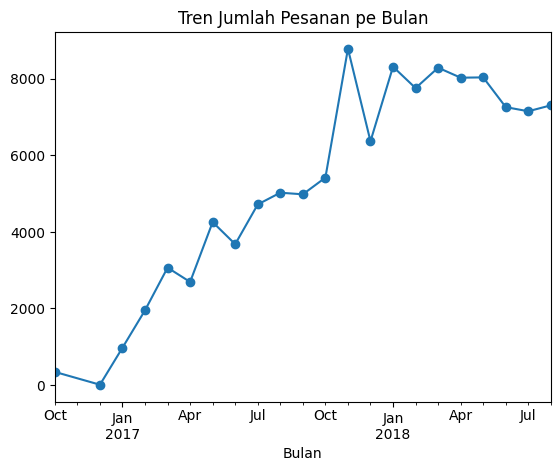

In [656]:
order_trend = main_data.groupby(main_data['order_purchase_timestamp'].dt.to_period('M')).size()
fig, ax = plt.subplots()
order_trend.plot(marker='o', linestyle='-', ax=ax)
plt.title('Tren Jumlah Pesanan pe Bulan')
plt.xlabel('Bulan')
plt.show()

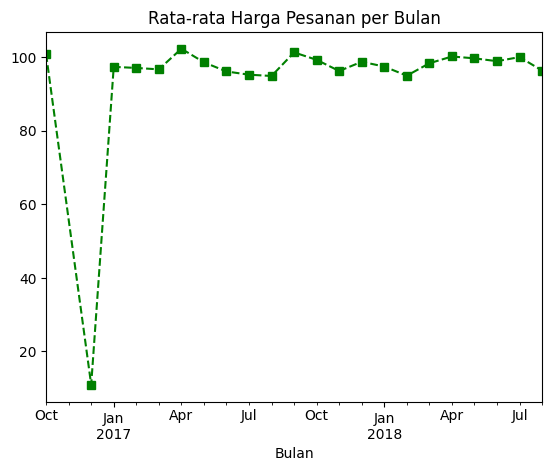

In [657]:
avg_price_trend = main_data.groupby(main_data['order_purchase_timestamp'].dt.to_period('M'))['price'].mean()
fig, ax = plt.subplots()
avg_price_trend.plot(marker='s', linestyle='--', color='green', ax=ax)
plt.xlabel('Bulan')
plt.title('Rata-rata Harga Pesanan per Bulan')
plt.show()

Jumlah pesanan per bulan mengalami kenaikan, terutama pada awal tahun 2017 sampai akhir tahun 2017. Untuk rata-rata harga pesanan cenderung stabil, kecuali pada akhir tahun 2016 yang disebabkan karena minimnya jumlah pesanan pada bulan tersebut.

### Pertanyaan 2: Bagaimana kinerja produk berdasarkan harga dan ulasan pelanggan?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25828\3150223552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=main_data, x='review_score', palette='coolwarm', ax=ax)


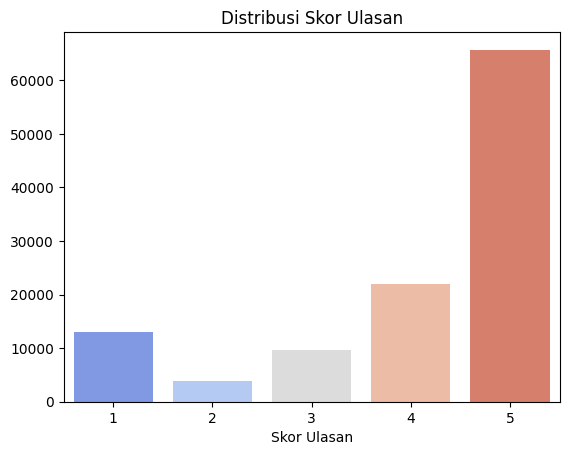

In [658]:
fig, ax = plt.subplots()
sns.countplot(data=main_data, x='review_score', palette='coolwarm', ax=ax)
plt.title('Distribusi Skor Ulasan')
plt.xlabel('Skor Ulasan')
plt.ylabel(None)
plt.show()

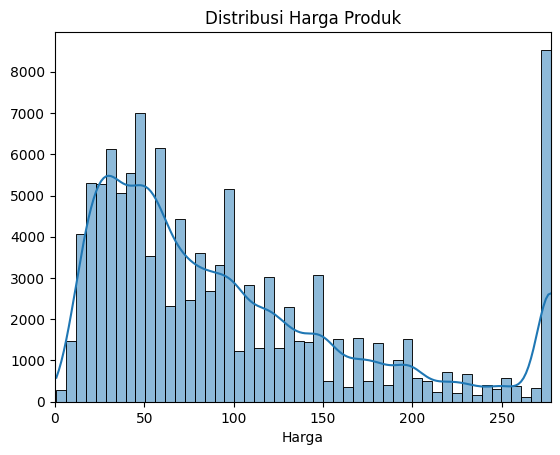

In [659]:
fig, ax = plt.subplots()
sns.histplot(main_data['price'], bins=50, kde=True, ax=ax)
plt.xlim(0, main_data['price'].quantile(0.99))
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga')
plt.ylabel(None)
plt.show()

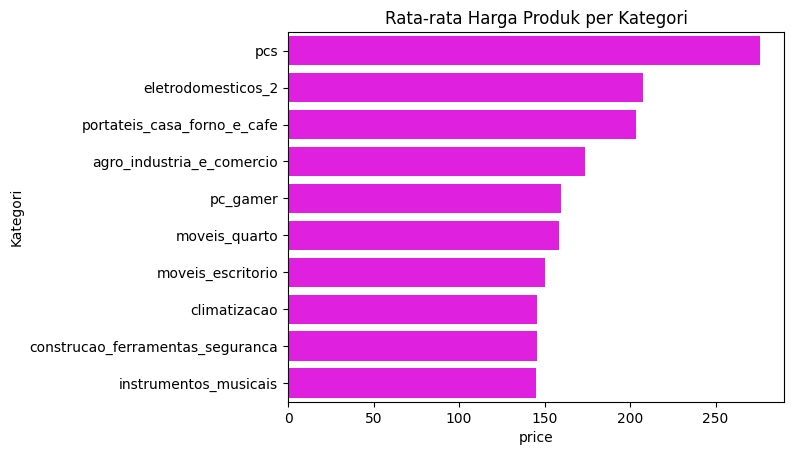

In [660]:
avg_price = main_data.groupby('product_category_name')['price'].mean().sort_values(ascending=False).head(10).reset_index()
fig, ax = plt.subplots()
sns.barplot(y='product_category_name',x='price',data=avg_price,color='magenta')
plt.ylabel('Kategori')
plt.title('Rata-rata Harga Produk per Kategori')
plt.show()

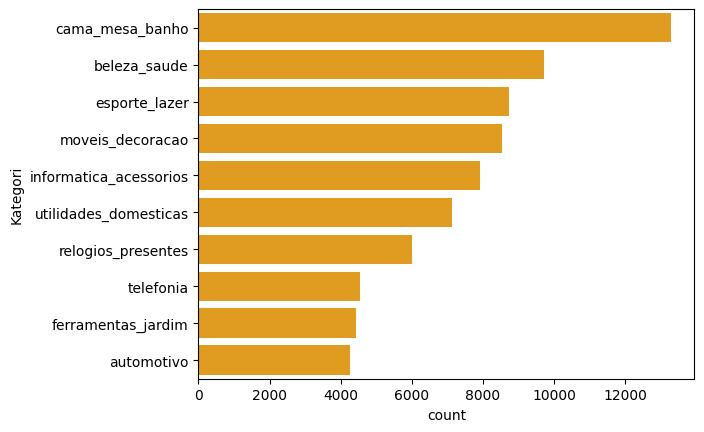

In [661]:
product_count = main_data['product_category_name'].value_counts().sort_values(ascending=False).head(10).reset_index()
fig, ax = plt.subplots()
sns.barplot(y='product_category_name',x='count',data=product_count, color='orange')
plt.ylabel('Kategori')
plt.show()

Distribusi skor ulasan menunjukkan bahwa wayoritas customer memberikan ulasan yang tinggi, namun masih ada customer yang memberikan skor rendah. Kemudian sebaran harga produk cukup lebar, dengan beberapa produk memiliki harga yang jauh lebih tinggi dibanding produk lainnya. Salah satu kategori produk yang memiliki rata-rata harga yang tinggi adalah __pcs__. Selanjutnya untuk rata-rata penjualan terbesar dipegang oleh kategori __cama_mesa_banho__.

### Pertanyaan 3: Bagaimana distribusi transaksi berdasarkan wilayah?

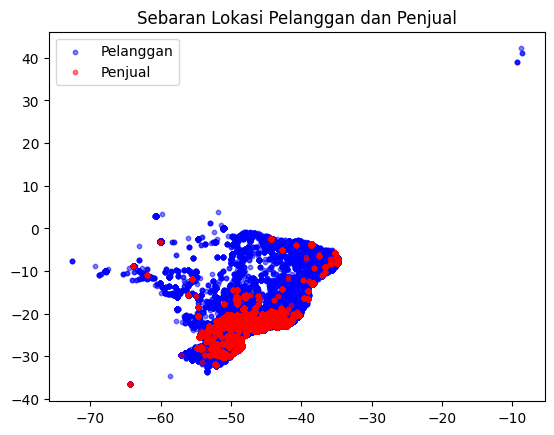

In [662]:
fig, ax = plt.subplots()
ax.scatter(main_data['cust_lng'], main_data['cust_lat'], alpha=0.5, label='Pelanggan', color='blue', s=10)
ax.scatter(main_data['seller_lng'], main_data['seller_lat'], alpha=0.5, label='Penjual', color='red', s=10)
ax.legend()
plt.title('Sebaran Lokasi Pelanggan dan Penjual')
plt.show()

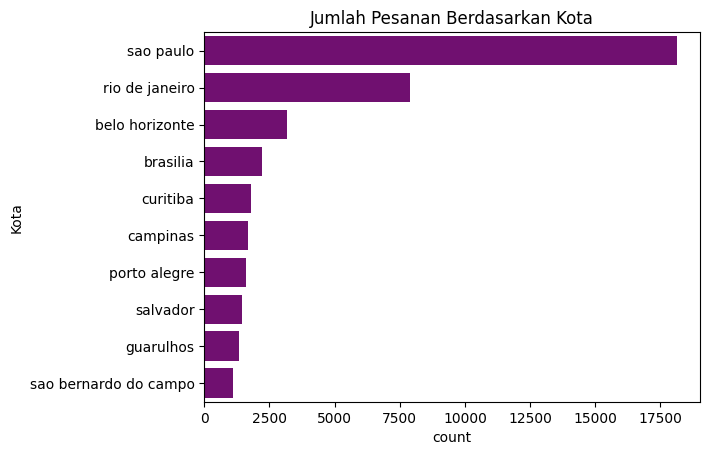

In [663]:
city_order_count = main_data['customer_city'].value_counts().head(10).reset_index()
fig, ax = plt.subplots()
sns.barplot(y='customer_city',x='count',data=city_order_count, color='purple')
plt.ylabel('Kota')
plt.title('Jumlah Pesanan Berdasarkan Kota')
plt.show()

Sebaran lokasi _customer_ dan _seller_ cukup luas, beberapa _customer_ berlokasi cukup jauh dari manyoritas _customer_ yang ada. Untuk distribusi pesanan berdasarkan kota didapatkan mayoritas pesanan berasal dari kota __Sau Paulo__, hal ini dapat menjadi target peningkatan layanan di kota tersebut.

## Analisis Lanjutan (Opsional)

### RFM Analisis

In [664]:
rfm_df = main_data.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df

,customer_id,order_purchase_timestamp,order_id,payment_value
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01
...,...,...,...,...
95334,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,1,91.91
95335,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,1,81.36
95336,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,1,63.13
95337,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,1,214.13


In [665]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["order_purchase_timestamp"] = rfm_df["order_purchase_timestamp"].dt.date

In [666]:
recent_date = main_data["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["order_purchase_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("order_purchase_timestamp", axis=1, inplace=True)
rfm_df

,customer_id,order_id,payment_value,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288
1,000161a058600d5901f007fab4c27140,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378
4,000379cdec625522490c315e70c7a9fb,1,107.01,149
...,...,...,...,...
95334,fffcb937e9dd47a13f05ecb8290f4d3e,1,91.91,165
95335,fffecc9f79fd8c764f843e9951b11341,1,81.36,153
95336,fffeda5b6d849fbd39689bb92087f431,1,63.13,99
95337,ffff42319e9b2d713724ae527742af25,1,214.13,77


In [667]:
rfm_df.columns = ["customer_id", "frequency", "monetary", "recency"]
rfm_df

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288
1,000161a058600d5901f007fab4c27140,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378
4,000379cdec625522490c315e70c7a9fb,1,107.01,149
...,...,...,...,...
95334,fffcb937e9dd47a13f05ecb8290f4d3e,1,91.91,165
95335,fffecc9f79fd8c764f843e9951b11341,1,81.36,153
95336,fffeda5b6d849fbd39689bb92087f431,1,63.13,99
95337,ffff42319e9b2d713724ae527742af25,1,214.13,77


C:\Users\lenovo\AppData\Local\Temp\ipykernel_25828\1384669494.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25828\1384669494.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25828\1384669494.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fal

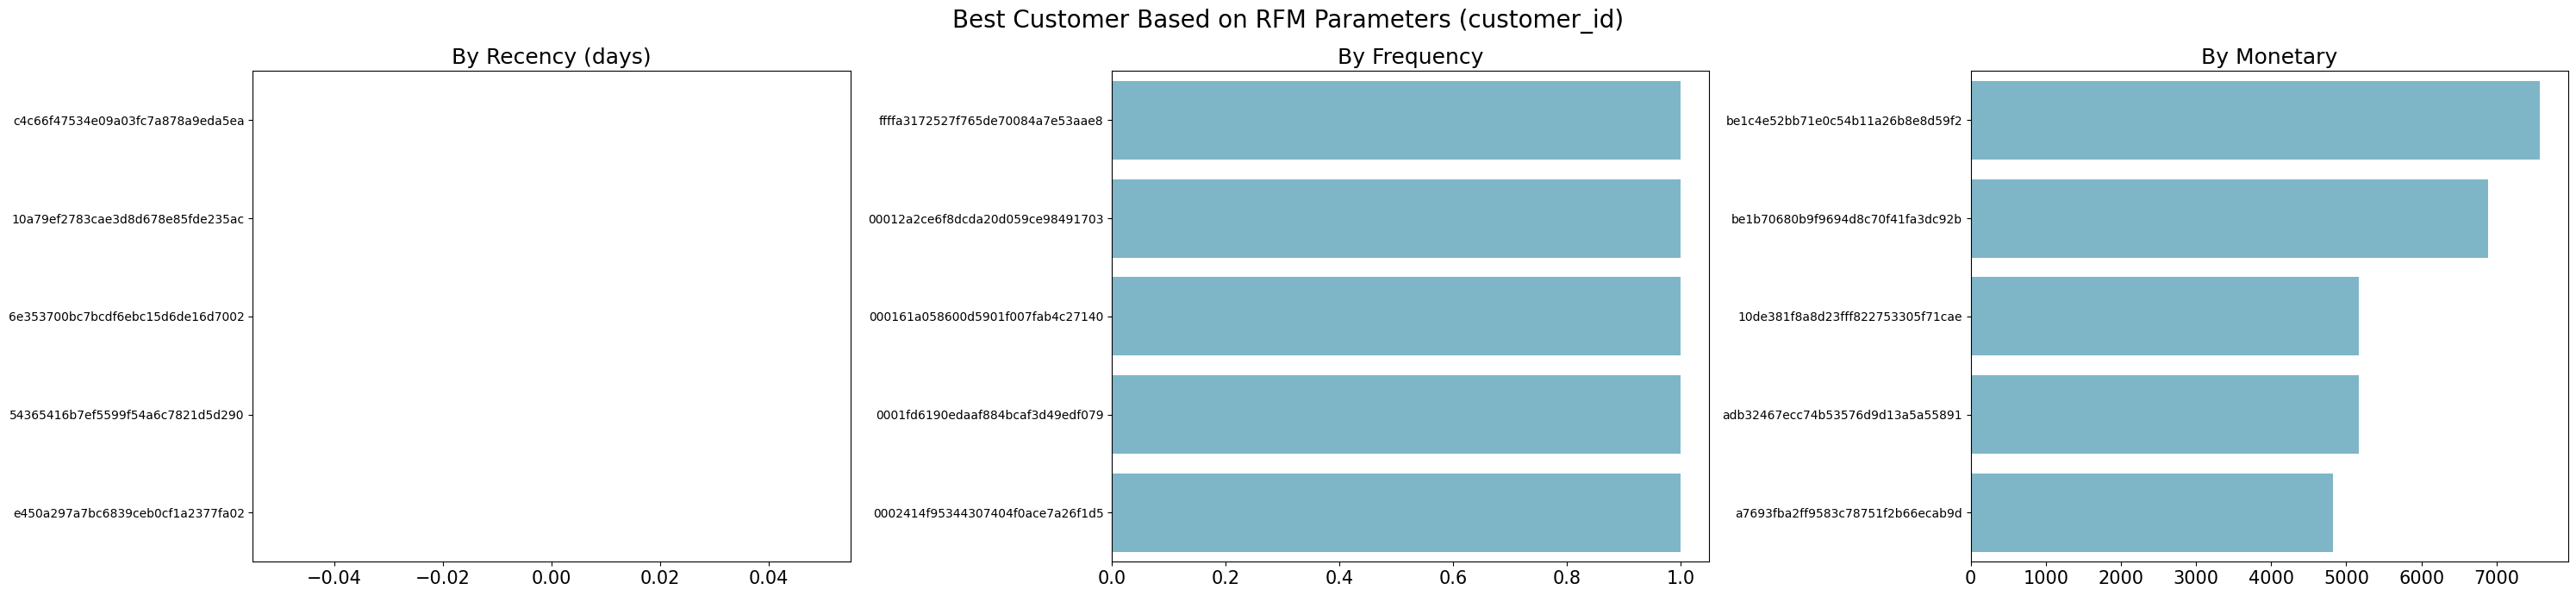

In [668]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 7))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.tight_layout()
plt.show()

Dari visualisasi di atas didapatkan beberapa pelanggan terbaik menurut _Recency, Frequency,_ dan _Monetary_.  Dari segi _Recency_ cukup banyak pelanggan yang baru saja melakukan transaksi di e-commers. Kemudian dari segi _frequency_ seluruh pelangngan cenderung hanya melakukan satu transaksi saja, hal ini bisa dijadikan fokus utama agar pelanggan bisa tertarik untuk bertransaksi lagi. Dan berdasarkan _monetary_ beberapa pelanggan cukup banyak mengeluarkan uangnya untuk berbelanja, dengan nilai maksimal berada di angka 7000-an.

## Conclusion

- Tren jumlah pesanan per bulan mengalami kenaikan yang signifikan, terutama pada awal tahun 2017 hingga akhir tahun 2017. Ini menunjukkan bahwa ada peningkatan aktivitas pembelian dalam periode tersebut. Meskipun begitu, rata-rata harga pesanan cenderung stabil, kecuali pada akhir tahun 2016 yang mengalami fluktuasi akibat minimnya jumlah pesanan pada bulan tersebut. Hal ini menunjukkan bahwa permintaan pasar tetap terjaga meskipun harga produk tidak mengalami perubahan drastis.
- Distribusi skor ulasan menunjukkan bahwa mayoritas pelanggan memberikan ulasan positif dengan skor tinggi. Namun, masih ada sebagian pelanggan yang memberikan skor rendah, yang bisa menjadi indikator masalah pada kualitas produk atau layanan pelanggan. Sebaran harga produk juga cukup luas, dengan beberapa kategori memiliki rata-rata harga yang jauh lebih tinggi dibandingkan kategori lainnya. Salah satu kategori dengan rata-rata harga tertinggi adalah pcs, sedangkan kategori dengan jumlah penjualan terbanyak adalah cama_mesa_banho. Ini menunjukkan bahwa produk dengan harga tinggi tidak selalu menjadi yang paling laris, sehingga strategi penetapan harga dan promosi harus disesuaikan dengan preferensi pelanggan.
- Sebaran lokasi pelanggan dan penjual cukup luas, tetapi ada beberapa pelanggan yang berlokasi jauh dari mayoritas pelanggan lainnya. Dari analisis wilayah, mayoritas pesanan berasal dari kota Sao Paulo, yang menunjukkan bahwa kota ini merupakan pusat utama e-commerce. Hal ini dapat menjadi peluang bagi perusahaan untuk meningkatkan layanan di wilayah tersebut, seperti mempercepat waktu pengiriman dan meningkatkan ketersediaan produk.

In [669]:
main_data.to_csv(r'dashboard\main_data.csv')